# Pre-processing and structuring images 

## Please do not run this if you dont have zip file of 7800 images 

In [ ]:
#Authored by Le Ngoc Canh
#Please do not run this if you dont have zip file of 7800 images
import os
from PIL import Image
import numpy as np

def preprocessing(img):
    image = img.resize((70,70))
    image = np.array(image)
    image = image.reshape(1,14700)
    image = image/255.0
    return image

#Please change the path address when you open the file at your local computer
path = 'C:\\Users\\NGOCCANH001\\Desktop\\FYPDataSet\\FYPDataSet'
folderdataset = os.listdir(path)

data = list()
label = []

In [ ]:
for i in range(0,13):
    print(i)

In [ ]:
for i in range(0,13):
    print("Counting start at: ",i)
    cnt = 0
    for subject in folderdataset:
        cnt = cnt + 1
        print(cnt)
        folders_path = path + '\\' + subject
        folders = os.listdir(folders_path)[i*10:i*10+10]
        for imgfile in folders:
            img = Image.open(folders_path + '\\' + imgfile)
            img = preprocessing(img)
            data.append(img)
            label.append(int(subject))

In [ ]:
import pandas as pd
data = np.asarray(data)
data = data.reshape(data.shape[0],data.shape[1]*data.shape[2])
data

In [ ]:
label = np.asarray(label)

In [ ]:
print(data.shape)
print(label.shape)

In [ ]:
df = pd.DataFrame(data)
df.to_csv('Dataset_final.csv', index=False)

In [ ]:
label = label.reshape(1,6890)
lb = pd.DataFrame(label)
lb.to_csv('Label_final.csv', index = False)

## Run from this line onward if you have csv files of data and label. Please ignore the above part if you don't have zip files of original images. 


# Model and Algortihm Design

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import SparsePCA as PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

In [2]:
df = pd.read_csv('Dataset_final.csv')

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14690,14691,14692,14693,14694,14695,14696,14697,14698,14699
0,0.015686,0.015686,0.023529,0.011765,0.015686,0.023529,0.019608,0.027451,0.023529,0.015686,...,0.027451,0.011765,0.015686,0.031373,0.580392,0.588235,0.584314,0.015686,0.023529,0.011765
1,0.011765,0.015686,0.035294,0.015686,0.019608,0.035294,0.019608,0.023529,0.039216,0.031373,...,0.047059,0.027451,0.043137,0.054902,0.584314,0.592157,0.588235,0.015686,0.019608,0.035294
2,0.015686,0.019608,0.035294,0.003922,0.007843,0.023529,0.015686,0.019608,0.027451,0.019608,...,0.027451,0.007843,0.023529,0.027451,0.600000,0.607843,0.596078,0.027451,0.031373,0.039216
3,0.015686,0.011765,0.031373,0.019608,0.015686,0.035294,0.023529,0.019608,0.039216,0.011765,...,0.043137,0.031373,0.035294,0.043137,0.600000,0.607843,0.588235,0.003922,0.011765,0.007843
4,0.023529,0.023529,0.031373,0.015686,0.015686,0.023529,0.011765,0.011765,0.019608,0.023529,...,0.050980,0.007843,0.011765,0.019608,0.254902,0.250980,0.231373,0.019608,0.023529,0.031373


In [4]:
label = pd.read_csv('Label_final.csv')

In [5]:
print(label)

     0    1    2    3    4    5    6    7    8    9  ...  6880  6881  6882  \
0  410  410  410  410  410  410  410  410  410  410  ...   670   670   670   

   6883  6884  6885  6886  6887  6888  6889  
0   670   670   670   670   670   670   670  

[1 rows x 6890 columns]


In [6]:
data = df.to_numpy()
label = np.asarray(label)
label = label.reshape(6890,)
print(data.shape)
print(label.shape)

(6890, 14700)
(6890,)


In [7]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(label))))

There are 6890 images in the dataset
There are 53 unique targets in the dataset


In [8]:
X = data
print("X shape:",X.shape)

X shape: (6890, 14700)


In [9]:
X_train, X_test, y_train, y_test=train_test_split(X, label, test_size=0.2, stratify=label, random_state=42)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (5512, 14700)
y_train shape:(5512,)


<AxesSubplot:title={'center':'Number of Samples for Each Classes'}, xlabel='subject ids'>

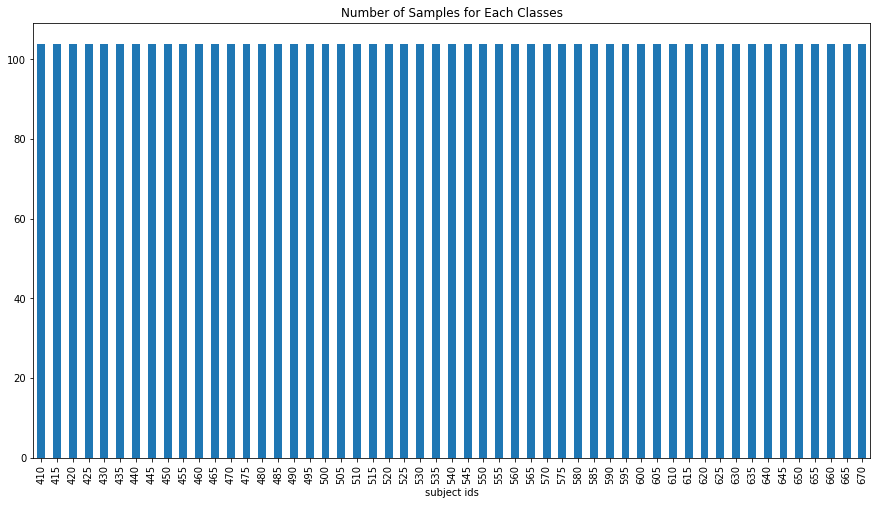

In [10]:
y_frame = pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [12]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

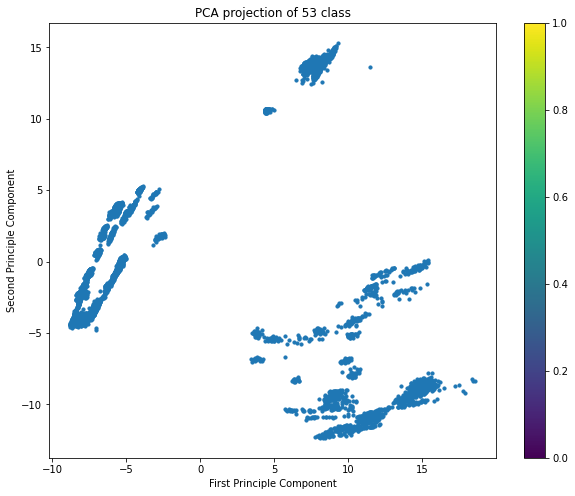

In [12]:
number_of_label=53
index_range = number_of_label*130
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter = ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1],
            s=10,
           cmap=plt.get_cmap('jet', number_of_label)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} class".format(number_of_label))

fig.colorbar(scatter)

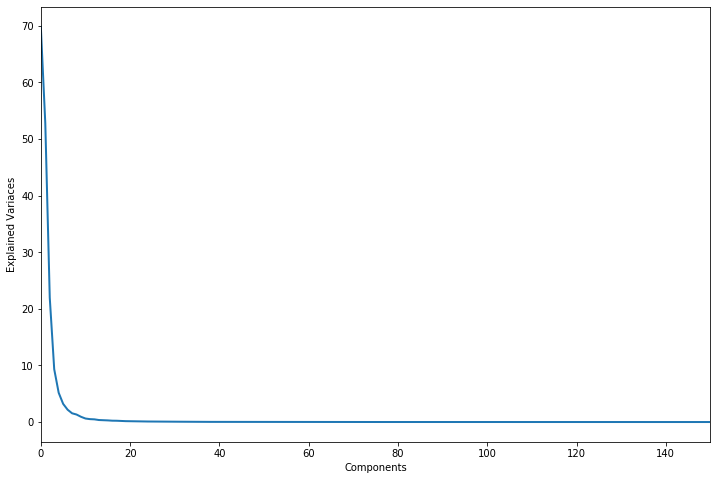

In [13]:
#Skip it in case you didn't need it since it is required long period to run
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.xlim([0, 150])
plt.show()

## Model running

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 1
Train accuracy score:0.0495
Test accuracy score:0.0537
Execution time: 5.431359052658081 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 2
Train accuracy score:0.1323
Test accuracy score:0.1248
Execution time: 3.1529979705810547 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 3
Train accuracy score:0.2696
Test accuracy score:0.2518
Execution time: 2.865304470062256 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 4
Train accuracy score:0.4784
Test accuracy score:0.4565
Execution time: 3.1972339153289795 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 5
Train accuracy score:0.5138
Test accuracy score:0.4927
Execution time: 3.601940631866455 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 6
Train accuracy score:0.5386
Test accuracy score:0.5174
Execution time: 3.336850166320801 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 7
Train accuracy score:0.6495
Test accuracy score:0.6335
Execution time: 3.4077861309051514 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 8
Train accuracy score:0.6887
Test accuracy score:0.6756
Execution time: 4.070780277252197 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 9
Train accuracy score:0.7288
Test accuracy score:0.7141
Execution time: 4.175396680831909 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 10
Train accuracy score:0.7705
Test accuracy score:0.7656
Execution time: 3.5477170944213867 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 11
Train accuracy score:0.7959
Test accuracy score:0.7772
Execution time: 4.068176746368408 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 12
Train accuracy score:0.8122
Test accuracy score:0.7983
Execution time: 3.909156322479248 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 13
Train accuracy score:0.8351
Test accuracy score:0.8345
Execution time: 3.9327890872955322 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 14
Train accuracy score:0.8509
Test accuracy score:0.8447
Execution time: 3.748504638671875 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 15
Train accuracy score:0.8520
Test accuracy score:0.8447
Execution time: 4.278586149215698 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 16
Train accuracy score:0.8636
Test accuracy score:0.8520
Execution time: 4.027500152587891 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 17
Train accuracy score:0.8708
Test accuracy score:0.8687
Execution time: 3.943619966506958 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 18
Train accuracy score:0.8797
Test accuracy score:0.8708
Execution time: 3.98419451713562 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 19
Train accuracy score:0.8830
Test accuracy score:0.8759
Execution time: 4.514854192733765 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 20
Train accuracy score:0.8877
Test accuracy score:0.8752
Execution time: 4.1269309520721436 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 21
Train accuracy score:0.8948
Test accuracy score:0.8839
Execution time: 4.412090301513672 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 22
Train accuracy score:0.9080
Test accuracy score:0.8991
Execution time: 4.469105958938599 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 23
Train accuracy score:0.9153
Test accuracy score:0.9093
Execution time: 4.233374118804932 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 24
Train accuracy score:0.9202
Test accuracy score:0.9151
Execution time: 4.084970712661743 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 25
Train accuracy score:0.9271
Test accuracy score:0.9187
Execution time: 4.108343839645386 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 26
Train accuracy score:0.9323
Test accuracy score:0.9325
Execution time: 4.3485188484191895 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 27
Train accuracy score:0.9352
Test accuracy score:0.9311
Execution time: 4.165803909301758 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 28
Train accuracy score:0.9392
Test accuracy score:0.9354
Execution time: 4.21422815322876 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 29
Train accuracy score:0.9381
Test accuracy score:0.9311
Execution time: 4.3138039112091064 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 30
Train accuracy score:0.9401
Test accuracy score:0.9325
Execution time: 4.907262086868286 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 31
Train accuracy score:0.9418
Test accuracy score:0.9332
Execution time: 5.282206773757935 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 32
Train accuracy score:0.9429
Test accuracy score:0.9347
Execution time: 4.646500110626221 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 33
Train accuracy score:0.9436
Test accuracy score:0.9332
Execution time: 4.733567953109741 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 34
Train accuracy score:0.9478
Test accuracy score:0.9405
Execution time: 4.853472709655762 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 35
Train accuracy score:0.9470
Test accuracy score:0.9369
Execution time: 5.108039140701294 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 36
Train accuracy score:0.9485
Test accuracy score:0.9325
Execution time: 6.480629205703735 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 37
Train accuracy score:0.9530
Test accuracy score:0.9376
Execution time: 5.264986038208008 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 38
Train accuracy score:0.9545
Test accuracy score:0.9340
Execution time: 5.558457612991333 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 39
Train accuracy score:0.9559
Test accuracy score:0.9412
Execution time: 5.589322090148926 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 40
Train accuracy score:0.9601
Test accuracy score:0.9463
Execution time: 5.434731721878052 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 41
Train accuracy score:0.9637
Test accuracy score:0.9536
Execution time: 5.775060415267944 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 42
Train accuracy score:0.9650
Test accuracy score:0.9550
Execution time: 5.722614526748657 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 43
Train accuracy score:0.9650
Test accuracy score:0.9543
Execution time: 6.262594223022461 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 44
Train accuracy score:0.9663
Test accuracy score:0.9565
Execution time: 6.528268814086914 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 45
Train accuracy score:0.9673
Test accuracy score:0.9623
Execution time: 6.3674867153167725 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 46
Train accuracy score:0.9686
Test accuracy score:0.9608
Execution time: 6.38777494430542 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 47
Train accuracy score:0.9708
Test accuracy score:0.9637
Execution time: 5.967829704284668 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 48
Train accuracy score:0.9713
Test accuracy score:0.9659
Execution time: 5.742128133773804 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 49
Train accuracy score:0.9713
Test accuracy score:0.9637
Execution time: 6.035276174545288 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 50
Train accuracy score:0.9715
Test accuracy score:0.9659
Execution time: 6.351434946060181 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 51
Train accuracy score:0.9704
Test accuracy score:0.9681
Execution time: 6.653677225112915 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 52
Train accuracy score:0.9710
Test accuracy score:0.9673
Execution time: 7.011995077133179 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 53
Train accuracy score:0.9710
Test accuracy score:0.9702
Execution time: 6.3538103103637695 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 54
Train accuracy score:0.9724
Test accuracy score:0.9717
Execution time: 5.990912675857544 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 55
Train accuracy score:0.9728
Test accuracy score:0.9695
Execution time: 6.310037851333618 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 56
Train accuracy score:0.9751
Test accuracy score:0.9681
Execution time: 6.003825426101685 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 57
Train accuracy score:0.9750
Test accuracy score:0.9702
Execution time: 6.685807704925537 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 58
Train accuracy score:0.9764
Test accuracy score:0.9702
Execution time: 6.192027807235718 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 59
Train accuracy score:0.9766
Test accuracy score:0.9702
Execution time: 6.753198146820068 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 60
Train accuracy score:0.9768
Test accuracy score:0.9695
Execution time: 7.2118284702301025 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 61
Train accuracy score:0.9770
Test accuracy score:0.9688
Execution time: 6.871532917022705 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 62
Train accuracy score:0.9768
Test accuracy score:0.9710
Execution time: 6.883404731750488 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 63
Train accuracy score:0.9780
Test accuracy score:0.9695
Execution time: 6.98332953453064 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 64
Train accuracy score:0.9788
Test accuracy score:0.9710
Execution time: 8.038428544998169 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 65
Train accuracy score:0.9788
Test accuracy score:0.9717
Execution time: 7.396320343017578 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 66
Train accuracy score:0.9795
Test accuracy score:0.9731
Execution time: 7.153144121170044 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 67
Train accuracy score:0.9804
Test accuracy score:0.9775
Execution time: 7.258229970932007 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 68
Train accuracy score:0.9811
Test accuracy score:0.9797
Execution time: 7.153634548187256 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 69
Train accuracy score:0.9815
Test accuracy score:0.9782
Execution time: 6.509470224380493 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 70
Train accuracy score:0.9820
Test accuracy score:0.9797
Execution time: 6.5458824634552 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 71
Train accuracy score:0.9819
Test accuracy score:0.9797
Execution time: 6.684767961502075 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 72
Train accuracy score:0.9828
Test accuracy score:0.9797
Execution time: 6.481274127960205 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 73
Train accuracy score:0.9829
Test accuracy score:0.9811
Execution time: 7.268133640289307 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 74
Train accuracy score:0.9840
Test accuracy score:0.9819
Execution time: 7.3819169998168945 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 75
Train accuracy score:0.9844
Test accuracy score:0.9804
Execution time: 8.126001596450806 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 76
Train accuracy score:0.9846
Test accuracy score:0.9797
Execution time: 7.817337512969971 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 77
Train accuracy score:0.9848
Test accuracy score:0.9819
Execution time: 8.535295963287354 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 78
Train accuracy score:0.9857
Test accuracy score:0.9797
Execution time: 7.932082653045654 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 79
Train accuracy score:0.9855
Test accuracy score:0.9804
Execution time: 8.070456266403198 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 80
Train accuracy score:0.9862
Test accuracy score:0.9819
Execution time: 7.135365009307861 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 81
Train accuracy score:0.9866
Test accuracy score:0.9811
Execution time: 8.18171238899231 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 82
Train accuracy score:0.9869
Test accuracy score:0.9804
Execution time: 7.3904008865356445 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 83
Train accuracy score:0.9864
Test accuracy score:0.9819
Execution time: 7.750983953475952 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 84
Train accuracy score:0.9873
Test accuracy score:0.9826
Execution time: 7.645383358001709 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 85
Train accuracy score:0.9875
Test accuracy score:0.9826
Execution time: 7.968685150146484 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 86
Train accuracy score:0.9873
Test accuracy score:0.9819
Execution time: 8.924859285354614 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 87
Train accuracy score:0.9878
Test accuracy score:0.9819
Execution time: 8.639662027359009 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 88
Train accuracy score:0.9882
Test accuracy score:0.9833
Execution time: 7.832937955856323 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 89
Train accuracy score:0.9884
Test accuracy score:0.9833
Execution time: 9.058452129364014 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 90
Train accuracy score:0.9898
Test accuracy score:0.9826
Execution time: 7.661851406097412 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 91
Train accuracy score:0.9904
Test accuracy score:0.9826
Execution time: 8.508994579315186 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 92
Train accuracy score:0.9909
Test accuracy score:0.9826
Execution time: 8.406376361846924 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 93
Train accuracy score:0.9909
Test accuracy score:0.9862
Execution time: 8.841225862503052 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 94
Train accuracy score:0.9904
Test accuracy score:0.9862
Execution time: 8.169641256332397 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 95
Train accuracy score:0.9902
Test accuracy score:0.9869
Execution time: 8.768668174743652 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 96
Train accuracy score:0.9909
Test accuracy score:0.9862
Execution time: 8.39891791343689 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 97
Train accuracy score:0.9915
Test accuracy score:0.9862
Execution time: 8.562352418899536 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 98
Train accuracy score:0.9917
Test accuracy score:0.9862
Execution time: 8.401126623153687 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 99
Train accuracy score:0.9924
Test accuracy score:0.9869
Execution time: 8.907701253890991 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of components in PCA: 100
Train accuracy score:0.9927
Test accuracy score:0.9855
Execution time: 8.654914617538452 seconds


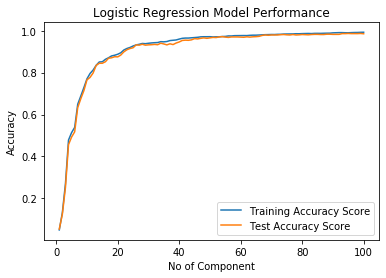

In [14]:
#Logistic Regession Model
no_components = []
train_accuracy_score = []
test_accuracy_score = []
execution_time = []
import time

for n in range (1,101,1):
    st = time.time()
    
    n_components = n
    pca=PCA(n_components=n_components, whiten=True)
    pca.fit(X_train)
    
    X_train_pca=pca.transform(X_train)
    X_test_pca=pca.transform(X_test)

    clf = LogisticRegression() #change the model name here to different name 
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    
    y_train_pred = clf.predict(X_train_pca)
    print("Number of components in PCA: {}".format(n_components))
    no_components.append(n_components)
    print("Train accuracy score:{:.4f}".format(metrics.accuracy_score(y_train, y_train_pred)))
    train_accuracy_score.append(metrics.accuracy_score(y_train, y_train_pred))
    print("Test accuracy score:{:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
    test_accuracy_score.append((metrics.accuracy_score(y_test, y_pred)))
    # get the end time
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    print('Execution time:', elapsed_time, 'seconds')
    execution_time.append(elapsed_time)

import matplotlib.pyplot as plt

plt.plot(no_components, train_accuracy_score, label = 'Training Accuracy Score')
plt.plot(no_components, test_accuracy_score, label = 'Test Accuracy Score')          
plt.xlabel('No of Component')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Model Performance')
plt.legend()
plt.show()

#Transform and save data including train accuracy, test accuracy, and execution for analysis
LRdf = pd.DataFrame(list(zip(train_accuracy_score, test_accuracy_score, execution_time)), columns =['Train accuracy', 'Test accuracy','Execution Time'], index = no_components )
LRdf.head()
LRdf.to_excel("LRdata.xlsx")

Number of components in PCA: 1
Train accuracy score:0.1669
Test accuracy score:0.1597
Execution time: 2.710510015487671 seconds
Number of components in PCA: 2
Train accuracy score:0.2179
Test accuracy score:0.2068
Execution time: 2.7771475315093994 seconds
Number of components in PCA: 3
Train accuracy score:0.3853
Test accuracy score:0.3679
Execution time: 2.6567599773406982 seconds
Number of components in PCA: 4
Train accuracy score:0.4777
Test accuracy score:0.4557
Execution time: 2.7289137840270996 seconds
Number of components in PCA: 5
Train accuracy score:0.4985
Test accuracy score:0.4862
Execution time: 2.7630512714385986 seconds
Number of components in PCA: 6
Train accuracy score:0.5327
Test accuracy score:0.5145
Execution time: 3.062748670578003 seconds
Number of components in PCA: 7
Train accuracy score:0.6041
Test accuracy score:0.5871
Execution time: 2.8490798473358154 seconds
Number of components in PCA: 8
Train accuracy score:0.6312
Test accuracy score:0.6089
Execution tim

Number of components in PCA: 65
Train accuracy score:0.9113
Test accuracy score:0.8948
Execution time: 4.072896957397461 seconds
Number of components in PCA: 66
Train accuracy score:0.9133
Test accuracy score:0.8933
Execution time: 4.39320969581604 seconds
Number of components in PCA: 67
Train accuracy score:0.9173
Test accuracy score:0.8977
Execution time: 3.9324045181274414 seconds
Number of components in PCA: 68
Train accuracy score:0.9175
Test accuracy score:0.9020
Execution time: 4.324183464050293 seconds
Number of components in PCA: 69
Train accuracy score:0.9207
Test accuracy score:0.9042
Execution time: 4.345892906188965 seconds
Number of components in PCA: 70
Train accuracy score:0.9202
Test accuracy score:0.9057
Execution time: 4.084958553314209 seconds
Number of components in PCA: 71
Train accuracy score:0.9211
Test accuracy score:0.9057
Execution time: 4.129376649856567 seconds
Number of components in PCA: 72
Train accuracy score:0.9218
Test accuracy score:0.9049
Execution 

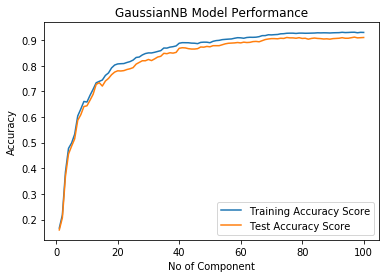

In [15]:
#GaussianNB Model Running
no_components = []
train_accuracy_score = []
test_accuracy_score = []
execution_time = []
import time

for n in range (1,101,1):
    st = time.time()
    
    n_components = n
    pca=PCA(n_components=n_components, whiten=True)
    pca.fit(X_train)
    
    X_train_pca=pca.transform(X_train)
    X_test_pca=pca.transform(X_test)

    clf = GaussianNB() #change the model name here
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    
    y_train_pred = clf.predict(X_train_pca)
    print("Number of components in PCA: {}".format(n_components))
    no_components.append(n_components)
    print("Train accuracy score:{:.4f}".format(metrics.accuracy_score(y_train, y_train_pred)))
    train_accuracy_score.append(metrics.accuracy_score(y_train, y_train_pred))
    print("Test accuracy score:{:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
    test_accuracy_score.append((metrics.accuracy_score(y_test, y_pred)))
    # get the end time
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    print('Execution time:', elapsed_time, 'seconds')
    execution_time.append(elapsed_time)

import matplotlib.pyplot as plt

plt.plot(no_components, train_accuracy_score, label = 'Training Accuracy Score')
plt.plot(no_components, test_accuracy_score, label = 'Test Accuracy Score')          
plt.xlabel('No of Component')
plt.ylabel('Accuracy')
plt.title('GaussianNB Model Performance')
plt.legend()
plt.show()

#Transform and save data including train accuracy, test accuracy, and execution for analysis
GaussianNBdf = pd.DataFrame(list(zip(train_accuracy_score, test_accuracy_score, execution_time)), columns =['Train accuracy', 'Test accuracy','Execution Time'], index = no_components )
GaussianNBdf.head()
GaussianNBdf.to_excel("GaussianNBdata.xlsx")

Number of components in PCA: 1
Train accuracy score:0.5063
Test accuracy score:0.3135
Execution time: 2.971383810043335 seconds
Number of components in PCA: 2
Train accuracy score:0.8053
Test accuracy score:0.7228
Execution time: 3.3392043113708496 seconds
Number of components in PCA: 3
Train accuracy score:0.9294
Test accuracy score:0.8999
Execution time: 3.3482840061187744 seconds
Number of components in PCA: 4
Train accuracy score:0.9664
Test accuracy score:0.9427
Execution time: 3.477348804473877 seconds
Number of components in PCA: 5
Train accuracy score:0.9762
Test accuracy score:0.9521
Execution time: 3.6572320461273193 seconds
Number of components in PCA: 6
Train accuracy score:0.9737
Test accuracy score:0.9528
Execution time: 3.5587408542633057 seconds
Number of components in PCA: 7
Train accuracy score:0.9597
Test accuracy score:0.9369
Execution time: 3.5730035305023193 seconds
Number of components in PCA: 8
Train accuracy score:0.9610
Test accuracy score:0.9383
Execution tim

Number of components in PCA: 65
Train accuracy score:0.9842
Test accuracy score:0.9673
Execution time: 5.674379587173462 seconds
Number of components in PCA: 66
Train accuracy score:0.9851
Test accuracy score:0.9673
Execution time: 6.059649229049683 seconds
Number of components in PCA: 67
Train accuracy score:0.9858
Test accuracy score:0.9681
Execution time: 6.771369934082031 seconds
Number of components in PCA: 68
Train accuracy score:0.9857
Test accuracy score:0.9688
Execution time: 6.233017683029175 seconds
Number of components in PCA: 69
Train accuracy score:0.9866
Test accuracy score:0.9681
Execution time: 6.026332855224609 seconds
Number of components in PCA: 70
Train accuracy score:0.9860
Test accuracy score:0.9673
Execution time: 6.031785726547241 seconds
Number of components in PCA: 71
Train accuracy score:0.9857
Test accuracy score:0.9681
Execution time: 6.475702285766602 seconds
Number of components in PCA: 72
Train accuracy score:0.9864
Test accuracy score:0.9695
Execution 

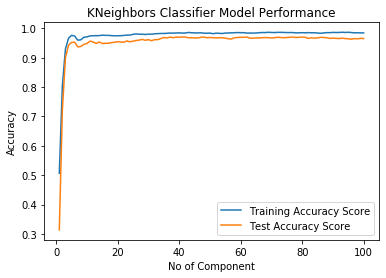

In [16]:
#KNeighborsClassifier Model Running
no_components = []
train_accuracy_score = []
test_accuracy_score = []
execution_time = []
import time

for n in range (1,101,1):
    st = time.time()
    
    n_components = n
    pca=PCA(n_components=n_components, whiten=True)
    pca.fit(X_train)
    
    X_train_pca=pca.transform(X_train)
    X_test_pca=pca.transform(X_test)

    clf = KNeighborsClassifier(n_neighbors=5) #change the model name here
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    
    y_train_pred = clf.predict(X_train_pca)
    print("Number of components in PCA: {}".format(n_components))
    no_components.append(n_components)
    print("Train accuracy score:{:.4f}".format(metrics.accuracy_score(y_train, y_train_pred)))
    train_accuracy_score.append(metrics.accuracy_score(y_train, y_train_pred))
    print("Test accuracy score:{:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
    test_accuracy_score.append((metrics.accuracy_score(y_test, y_pred)))
    # get the end time
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    print('Execution time:', elapsed_time, 'seconds')
    execution_time.append(elapsed_time)

import matplotlib.pyplot as plt

plt.plot(no_components, train_accuracy_score, label = 'Training Accuracy Score')
plt.plot(no_components, test_accuracy_score, label = 'Test Accuracy Score')          
plt.xlabel('No of Component')
plt.ylabel('Accuracy')
plt.title('KNeighbors Classifier Model Performance')
plt.legend()
plt.show()

#Transform and save data including train accuracy, test accuracy, and execution for analysis
KNeighborsClassifierdf = pd.DataFrame(list(zip(train_accuracy_score, test_accuracy_score, execution_time)), columns =['Train accuracy', 'Test accuracy','Execution Time'], index = no_components )
KNeighborsClassifierdf.head()
KNeighborsClassifierdf.to_excel("KNeighborsClassifierdata.xlsx")

Number of components in PCA: 1
Train accuracy score:0.9991
Test accuracy score:0.2823
Execution time: 2.8575234413146973 seconds
Number of components in PCA: 2
Train accuracy score:0.9998
Test accuracy score:0.6829
Execution time: 2.687199115753174 seconds
Number of components in PCA: 3
Train accuracy score:0.9998
Test accuracy score:0.8708
Execution time: 3.168187379837036 seconds
Number of components in PCA: 4
Train accuracy score:0.9998
Test accuracy score:0.9165
Execution time: 2.694147825241089 seconds
Number of components in PCA: 5
Train accuracy score:0.9998
Test accuracy score:0.9398
Execution time: 2.7369914054870605 seconds
Number of components in PCA: 6
Train accuracy score:0.9998
Test accuracy score:0.9405
Execution time: 2.7326643466949463 seconds
Number of components in PCA: 7
Train accuracy score:0.9998
Test accuracy score:0.9441
Execution time: 2.764204263687134 seconds
Number of components in PCA: 8
Train accuracy score:0.9998
Test accuracy score:0.9514
Execution time:

Number of components in PCA: 65
Train accuracy score:0.9998
Test accuracy score:0.9478
Execution time: 4.450871467590332 seconds
Number of components in PCA: 66
Train accuracy score:0.9998
Test accuracy score:0.9441
Execution time: 4.402303695678711 seconds
Number of components in PCA: 67
Train accuracy score:0.9998
Test accuracy score:0.9514
Execution time: 4.525568246841431 seconds
Number of components in PCA: 68
Train accuracy score:0.9998
Test accuracy score:0.9456
Execution time: 4.436471462249756 seconds
Number of components in PCA: 69
Train accuracy score:0.9998
Test accuracy score:0.9441
Execution time: 4.801804542541504 seconds
Number of components in PCA: 70
Train accuracy score:0.9998
Test accuracy score:0.9492
Execution time: 4.44810938835144 seconds
Number of components in PCA: 71
Train accuracy score:0.9998
Test accuracy score:0.9470
Execution time: 4.433368682861328 seconds
Number of components in PCA: 72
Train accuracy score:0.9998
Test accuracy score:0.9427
Execution t

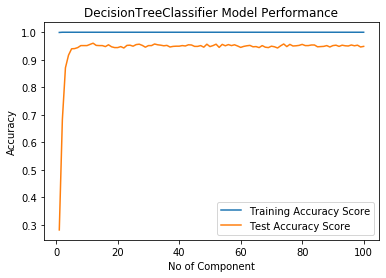

In [17]:
#DecisionTreeClassifier Model Running
no_components = []
train_accuracy_score = []
test_accuracy_score = []
execution_time = []
import time

for n in range (1,101,1):
    st = time.time()
    
    n_components = n
    pca=PCA(n_components=n_components, whiten=True)
    pca.fit(X_train)
    
    X_train_pca=pca.transform(X_train)
    X_test_pca=pca.transform(X_test)

    clf = DecisionTreeClassifier() #change the model name here
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    
    y_train_pred = clf.predict(X_train_pca)
    print("Number of components in PCA: {}".format(n_components))
    no_components.append(n_components)
    print("Train accuracy score:{:.4f}".format(metrics.accuracy_score(y_train, y_train_pred)))
    train_accuracy_score.append(metrics.accuracy_score(y_train, y_train_pred))
    print("Test accuracy score:{:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
    test_accuracy_score.append((metrics.accuracy_score(y_test, y_pred)))
    # get the end time
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    print('Execution time:', elapsed_time, 'seconds')
    execution_time.append(elapsed_time)

import matplotlib.pyplot as plt

plt.plot(no_components, train_accuracy_score, label = 'Training Accuracy Score')
plt.plot(no_components, test_accuracy_score, label = 'Test Accuracy Score')          
plt.xlabel('No of Component')
plt.ylabel('Accuracy')
plt.title('DecisionTreeClassifier Model Performance')
plt.legend()
plt.show()

#Transform and save data including train accuracy, test accuracy, and execution for analysis
DecisionTreeClassifierdf = pd.DataFrame(list(zip(train_accuracy_score, test_accuracy_score, execution_time)), columns =['Train accuracy', 'Test accuracy','Execution Time'], index = no_components )
DecisionTreeClassifierdf.head()
DecisionTreeClassifierdf.to_excel("DecisionTreeClassifierdata.xlsx")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 1
Train accuracy score:0.1805
Test accuracy score:0.1800
Execution time: 5.40037989616394 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 2
Train accuracy score:0.3480
Test accuracy score:0.3200
Execution time: 5.372357368469238 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 3
Train accuracy score:0.5492
Test accuracy score:0.5356
Execution time: 5.329525470733643 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 4
Train accuracy score:0.6580
Test accuracy score:0.6488
Execution time: 4.891052484512329 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 5
Train accuracy score:0.7333
Test accuracy score:0.7279
Execution time: 4.90035605430603 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 6
Train accuracy score:0.7743
Test accuracy score:0.7758
Execution time: 4.838029623031616 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 7
Train accuracy score:0.8300
Test accuracy score:0.8237
Execution time: 5.085769414901733 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 8
Train accuracy score:0.8505
Test accuracy score:0.8433
Execution time: 4.818393230438232 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 9
Train accuracy score:0.8752
Test accuracy score:0.8672
Execution time: 4.671154260635376 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 10
Train accuracy score:0.8962
Test accuracy score:0.8853
Execution time: 4.817966938018799 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 11
Train accuracy score:0.9082
Test accuracy score:0.8926
Execution time: 4.637293577194214 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 12
Train accuracy score:0.9144
Test accuracy score:0.8977
Execution time: 4.671064376831055 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 13
Train accuracy score:0.9185
Test accuracy score:0.9042
Execution time: 4.694633960723877 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 14
Train accuracy score:0.9202
Test accuracy score:0.9028
Execution time: 4.55621862411499 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 15
Train accuracy score:0.9227
Test accuracy score:0.8999
Execution time: 4.601243734359741 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 16
Train accuracy score:0.9202
Test accuracy score:0.9035
Execution time: 4.679424047470093 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 17
Train accuracy score:0.9260
Test accuracy score:0.9129
Execution time: 4.934103727340698 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 18
Train accuracy score:0.9291
Test accuracy score:0.9158
Execution time: 5.231716871261597 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 19
Train accuracy score:0.9256
Test accuracy score:0.9165
Execution time: 4.854329586029053 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 20
Train accuracy score:0.9256
Test accuracy score:0.9151
Execution time: 5.13068962097168 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 21
Train accuracy score:0.9269
Test accuracy score:0.9165
Execution time: 4.733354091644287 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 22
Train accuracy score:0.9292
Test accuracy score:0.9216
Execution time: 4.733332633972168 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 23
Train accuracy score:0.9283
Test accuracy score:0.9224
Execution time: 4.809398412704468 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 24
Train accuracy score:0.9325
Test accuracy score:0.9274
Execution time: 4.721512079238892 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 25
Train accuracy score:0.9452
Test accuracy score:0.9398
Execution time: 4.700166940689087 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 26
Train accuracy score:0.9485
Test accuracy score:0.9434
Execution time: 4.764871835708618 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 27
Train accuracy score:0.9499
Test accuracy score:0.9463
Execution time: 5.547693490982056 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 28
Train accuracy score:0.9510
Test accuracy score:0.9456
Execution time: 5.120357513427734 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 29
Train accuracy score:0.9492
Test accuracy score:0.9463
Execution time: 4.863225221633911 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 30
Train accuracy score:0.9510
Test accuracy score:0.9463
Execution time: 5.18146824836731 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 31
Train accuracy score:0.9510
Test accuracy score:0.9456
Execution time: 4.947367191314697 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 32
Train accuracy score:0.9552
Test accuracy score:0.9528
Execution time: 5.046167612075806 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 33
Train accuracy score:0.9572
Test accuracy score:0.9557
Execution time: 5.285832643508911 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 34
Train accuracy score:0.9608
Test accuracy score:0.9579
Execution time: 4.967158079147339 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 35
Train accuracy score:0.9614
Test accuracy score:0.9579
Execution time: 5.047325611114502 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 36
Train accuracy score:0.9641
Test accuracy score:0.9601
Execution time: 5.266378879547119 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 37
Train accuracy score:0.9650
Test accuracy score:0.9637
Execution time: 5.1455676555633545 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 38
Train accuracy score:0.9648
Test accuracy score:0.9615
Execution time: 5.114734888076782 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 39
Train accuracy score:0.9657
Test accuracy score:0.9630
Execution time: 5.400134325027466 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 40
Train accuracy score:0.9712
Test accuracy score:0.9681
Execution time: 5.200420618057251 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 41
Train accuracy score:0.9719
Test accuracy score:0.9681
Execution time: 5.131728887557983 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 42
Train accuracy score:0.9721
Test accuracy score:0.9688
Execution time: 5.325646162033081 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 43
Train accuracy score:0.9741
Test accuracy score:0.9702
Execution time: 5.401659250259399 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 44
Train accuracy score:0.9742
Test accuracy score:0.9702
Execution time: 5.631363391876221 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 45
Train accuracy score:0.9746
Test accuracy score:0.9702
Execution time: 5.494369745254517 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 46
Train accuracy score:0.9744
Test accuracy score:0.9724
Execution time: 5.268723011016846 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 47
Train accuracy score:0.9775
Test accuracy score:0.9731
Execution time: 5.348170042037964 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 48
Train accuracy score:0.9779
Test accuracy score:0.9746
Execution time: 5.660798072814941 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 49
Train accuracy score:0.9771
Test accuracy score:0.9746
Execution time: 5.698439121246338 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 50
Train accuracy score:0.9771
Test accuracy score:0.9717
Execution time: 5.759917497634888 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 51
Train accuracy score:0.9791
Test accuracy score:0.9739
Execution time: 6.181860446929932 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 52
Train accuracy score:0.9808
Test accuracy score:0.9739
Execution time: 5.8678436279296875 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 53
Train accuracy score:0.9797
Test accuracy score:0.9746
Execution time: 5.874493837356567 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 54
Train accuracy score:0.9804
Test accuracy score:0.9746
Execution time: 6.0665552616119385 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 55
Train accuracy score:0.9826
Test accuracy score:0.9804
Execution time: 5.999482870101929 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 56
Train accuracy score:0.9853
Test accuracy score:0.9804
Execution time: 6.096544981002808 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 57
Train accuracy score:0.9855
Test accuracy score:0.9826
Execution time: 6.047939300537109 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 58
Train accuracy score:0.9857
Test accuracy score:0.9833
Execution time: 6.1003031730651855 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 59
Train accuracy score:0.9862
Test accuracy score:0.9840
Execution time: 6.56055474281311 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 60
Train accuracy score:0.9864
Test accuracy score:0.9840
Execution time: 6.209164142608643 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 61
Train accuracy score:0.9877
Test accuracy score:0.9848
Execution time: 6.602880001068115 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 62
Train accuracy score:0.9868
Test accuracy score:0.9833
Execution time: 6.852792739868164 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 63
Train accuracy score:0.9878
Test accuracy score:0.9848
Execution time: 6.779085636138916 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 64
Train accuracy score:0.9888
Test accuracy score:0.9862
Execution time: 6.701541900634766 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 65
Train accuracy score:0.9889
Test accuracy score:0.9855
Execution time: 6.482877492904663 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 66
Train accuracy score:0.9895
Test accuracy score:0.9855
Execution time: 6.56091570854187 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 67
Train accuracy score:0.9904
Test accuracy score:0.9840
Execution time: 7.084807395935059 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 68
Train accuracy score:0.9907
Test accuracy score:0.9840
Execution time: 7.302678346633911 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 69
Train accuracy score:0.9909
Test accuracy score:0.9833
Execution time: 6.868908643722534 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 70
Train accuracy score:0.9909
Test accuracy score:0.9826
Execution time: 6.737149953842163 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 71
Train accuracy score:0.9911
Test accuracy score:0.9826
Execution time: 7.1831440925598145 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 72
Train accuracy score:0.9913
Test accuracy score:0.9833
Execution time: 6.959890365600586 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 73
Train accuracy score:0.9915
Test accuracy score:0.9833
Execution time: 6.96527886390686 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 74
Train accuracy score:0.9915
Test accuracy score:0.9840
Execution time: 6.725322246551514 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 75
Train accuracy score:0.9915
Test accuracy score:0.9840
Execution time: 7.144811391830444 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 76
Train accuracy score:0.9915
Test accuracy score:0.9840
Execution time: 7.065277099609375 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 77
Train accuracy score:0.9917
Test accuracy score:0.9855
Execution time: 7.406692981719971 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 78
Train accuracy score:0.9922
Test accuracy score:0.9848
Execution time: 7.152404308319092 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 79
Train accuracy score:0.9924
Test accuracy score:0.9855
Execution time: 7.347621440887451 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 80
Train accuracy score:0.9926
Test accuracy score:0.9855
Execution time: 7.731201648712158 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 81
Train accuracy score:0.9929
Test accuracy score:0.9855
Execution time: 7.394794940948486 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 82
Train accuracy score:0.9935
Test accuracy score:0.9862
Execution time: 7.891803741455078 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 83
Train accuracy score:0.9933
Test accuracy score:0.9855
Execution time: 7.51702618598938 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 84
Train accuracy score:0.9933
Test accuracy score:0.9855
Execution time: 7.892554521560669 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 85
Train accuracy score:0.9933
Test accuracy score:0.9840
Execution time: 8.126256227493286 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 86
Train accuracy score:0.9933
Test accuracy score:0.9848
Execution time: 8.232284545898438 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 87
Train accuracy score:0.9931
Test accuracy score:0.9848
Execution time: 7.87862753868103 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 88
Train accuracy score:0.9938
Test accuracy score:0.9855
Execution time: 8.345850467681885 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 89
Train accuracy score:0.9938
Test accuracy score:0.9855
Execution time: 8.179108142852783 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 90
Train accuracy score:0.9938
Test accuracy score:0.9862
Execution time: 8.445168495178223 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 91
Train accuracy score:0.9938
Test accuracy score:0.9840
Execution time: 8.462413311004639 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 92
Train accuracy score:0.9933
Test accuracy score:0.9833
Execution time: 8.842980146408081 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 93
Train accuracy score:0.9942
Test accuracy score:0.9855
Execution time: 8.456408739089966 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 94
Train accuracy score:0.9937
Test accuracy score:0.9862
Execution time: 8.355089664459229 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 95
Train accuracy score:0.9947
Test accuracy score:0.9862
Execution time: 8.666597366333008 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 96
Train accuracy score:0.9947
Test accuracy score:0.9862
Execution time: 8.489173650741577 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 97
Train accuracy score:0.9947
Test accuracy score:0.9862
Execution time: 8.686065912246704 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 98
Train accuracy score:0.9947
Test accuracy score:0.9855
Execution time: 8.73513412475586 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 99
Train accuracy score:0.9949
Test accuracy score:0.9869
Execution time: 9.225612163543701 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of components in PCA: 100
Train accuracy score:0.9949
Test accuracy score:0.9869
Execution time: 9.08246374130249 seconds


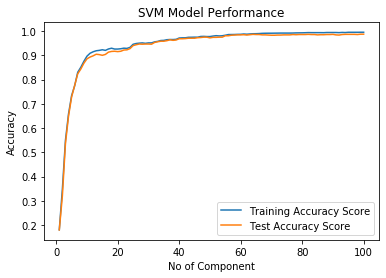

In [18]:
#SVM Model Runnning
no_components = []
train_accuracy_score = []
test_accuracy_score = []
execution_time = []
import time

for n in range (1,101,1):
    st = time.time()
    
    n_components = n
    pca=PCA(n_components=n_components, whiten=True)
    pca.fit(X_train)
    
    X_train_pca=pca.transform(X_train)
    X_test_pca=pca.transform(X_test)

    clf = SVC() #change the model name here
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    
    y_train_pred = clf.predict(X_train_pca)
    print("Number of components in PCA: {}".format(n_components))
    no_components.append(n_components)
    print("Train accuracy score:{:.4f}".format(metrics.accuracy_score(y_train, y_train_pred)))
    train_accuracy_score.append(metrics.accuracy_score(y_train, y_train_pred))
    print("Test accuracy score:{:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
    test_accuracy_score.append((metrics.accuracy_score(y_test, y_pred)))
    # get the end time
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    print('Execution time:', elapsed_time, 'seconds')
    execution_time.append(elapsed_time)

import matplotlib.pyplot as plt

plt.plot(no_components, train_accuracy_score, label = 'Training Accuracy Score')
plt.plot(no_components, test_accuracy_score, label = 'Test Accuracy Score')          
plt.xlabel('No of Component')
plt.ylabel('Accuracy')
plt.title('SVM Model Performance')
plt.legend()
plt.show()

#Transform and save data including train accuracy, test accuracy, and execution for analysis
SVMdf = pd.DataFrame(list(zip(train_accuracy_score, test_accuracy_score, execution_time)), columns =['Train accuracy', 'Test accuracy','Execution Time'], index = no_components )
SVMdf.head()
SVMdf.to_excel("SVMdata.xlsx")

## Final selection

In [16]:
#Final Selection of SVM with 58 components
n_components = 58
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
y_train_pred = clf.predict(X_train_pca)
print("Number of components in PCA: {}".format(n_components))
print("Accuracy score of test set:{:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Accuracy score of train test:{:.4f}".format(metrics.accuracy_score(y_train, y_train_pred)))

Number of components in PCA: 58
Accuracy score of test set:0.9840
Accuracy score of train test:0.9858


In [37]:
#Save the report to be more presentable in report
report = metrics.classification_report(y_test, y_pred, output_dict=True)
reportdf = pd.DataFrame(report)
reportdf.to_csv('GaussianNB97ClassReport.csv', index = False)


In [17]:
#Present the different cases of using different machine learning model
n_components=70
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
models=[]
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    
    clf=model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.4f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


========== LR RESULT ==========
Accuracy score:0.9869

========== NB RESULT ==========
Accuracy score:0.9064

========== KNN RESULT ==========
Accuracy score:0.9673

========== DT RESULT ==========
Accuracy score:0.9499

========== SVM RESULT ==========
Accuracy score:0.9819



In [39]:
#Save PCA Transformation model
import pickle as pk
pk.dump(pca, open("pca_final.pkl","wb"))

In [40]:
#Save Preidction model
import pickle as pk 
filename = 'model_final.sav'
pk.dump(clf, open(filename, 'wb'))